# LetsGrowMore
## Task 2
### Iris Flower Classification
#### Aditya Aman

##### Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

##### Data Cleaning

In [47]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'specie']

In [48]:
iris_df = pd.read_csv('iris.csv', names = columns)

In [49]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
shape = iris_df.shape
print(f'The data set has {shape[0]} rows and {shape[1]} columns')

The data set has 150 rows and 5 columns


In [51]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [52]:
iris_df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width          specie
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [53]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
iris_df['specie'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: specie, dtype: int64

In [56]:
iris_df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

##### Data Visaulisation

In [29]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

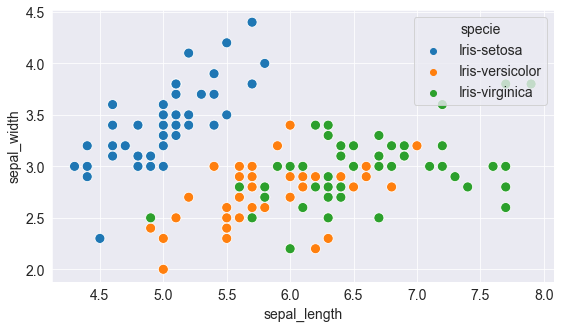

In [30]:
sns.scatterplot(x = iris_df.sepal_length, y = iris_df.sepal_width, hue = iris_df.specie, s = 100);

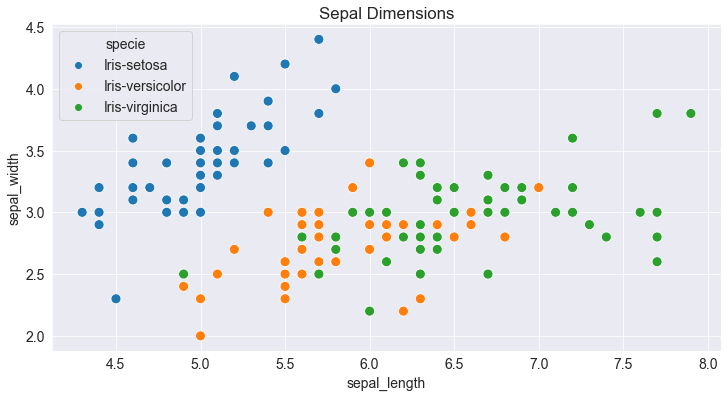

In [34]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x = iris_df.sepal_length, 
y = iris_df.sepal_width,
hue = iris_df.specie, s = 100);

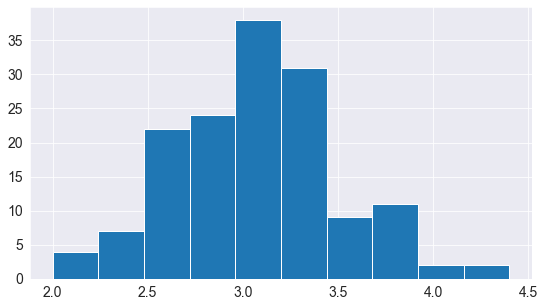

In [36]:
plt.hist(iris_df.sepal_width);

In [57]:
setosa_df = iris_df[iris_df.specie == 'Iris-setosa']
versicolor_df = iris_df[iris_df.specie == 'Iris-versicolor']
virginica_df = iris_df[iris_df.specie == 'Iris-virginica']

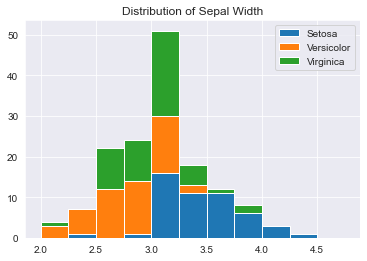

In [59]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

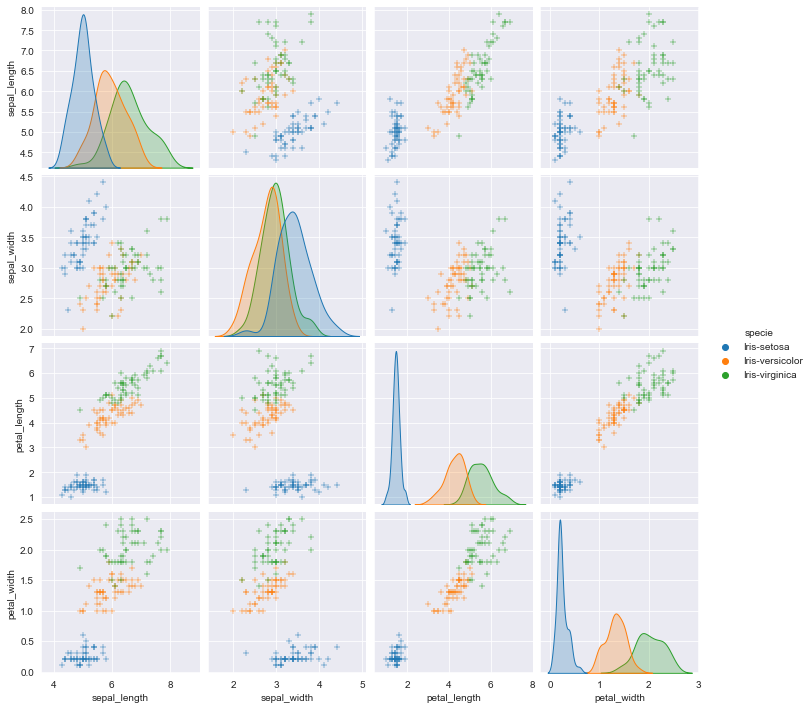

In [60]:
sns.pairplot(iris_df, hue='specie', markers='+')
plt.show()

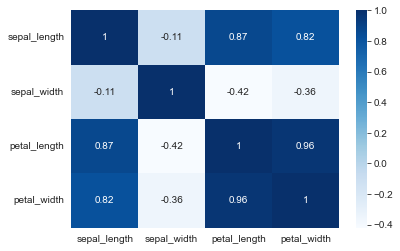

In [62]:
sns.heatmap(iris_df.corr(), annot=True, cmap='Blues')
plt.show()

#### Creating Model

##### Splitting data in testing and training set

In [76]:
x = iris_df.iloc[:, [0,1,2, 3]].values
y = iris_df.iloc[:, 4].values
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x,y, test_size = 0.2, random_state = 0)

##### Feature Scaling

In [77]:
sc = StandardScaler()
x_train_df = sc.fit_transform(x_train_df)
x_test_df = sc.transform(x_test_df)

##### Logistic Regression Model

In [79]:
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
model.fit(x_train_df, y_train_df)

LogisticRegression(random_state=0)

In [80]:
y_pred = model.predict(x_test_df)

In [82]:
probs_y = model.predict_proba(x_test_df)
probs_y = np.round(probs_y, 2)

In [83]:
result = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test_df", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
result += "-"*65+"\n"
result += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test_df, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
result += "\n"+"-"*65+"\n"
print(result)

y_test_df  | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-virginica | Iris-virginica | 0.0        | 0.03          | 0.97      
Iris-versicolor | Iris-versicolor | 0.01       | 0.96          | 0.04      
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.08          | 0.92      
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.01          | 0.99      
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-versicolor | Iris-versicolor | 0.01       | 0.71          | 0.28      
Iris-versicolor | Iris-versicolor | 0.0        | 0.73          | 0.27      
Iris-versicolor | Iris-versicolor | 0.02       | 0.9           | 0.08      
Iris-virginica | Iris-virginica | 0.0        | 0.48          | 0.52      
Iris-versicolor | Iris-versicolor | 0.02       | 0.76         

##### Confusion Matrix

In [84]:
conf_mat = confusion_matrix(y_test_df, y_pred)
print(conf_mat)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


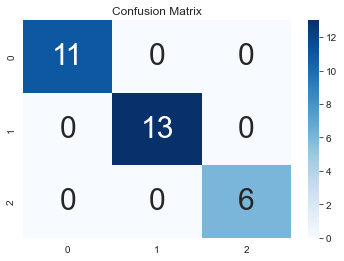

In [85]:
axes = plt.axes()
conf_mat_df = conf_mat
sns.heatmap(conf_mat_df, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = axes )
axes.set_title('Confusion Matrix')
plt.show()